### 02 Explorartory Data Analysis

In [1]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
# Function for cummulative barplt by income
def cum_barplot_by_income(df, var, xlabels, title, size, 
                          offsetlist1, x1, y1, 
                          offsetlist2, x2, y2, 
                          offsetlist3, x3, y3, 
                          offsetlist4, x4, y4):
  rtable = pd.concat([pd.crosstab(df[var], df['INCOME_CATEGORY']), 
                      df[var].value_counts()], axis=1)
  rtable.columns = ['Very Low-Income', 'Low-Income', 'Modest-Income', 
                    'Higher-Income', 'Total']
  rtable.index = xlabels

  result = (rtable.div(rtable.sum(axis=0), axis=1)).T

  print(result)

  colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']

  ax = result.plot.barh(align='center', stacked=True, figsize=size, 
                        color=colors, width=0.8)

  ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
  ax.set_xlim(0, 1)
  ax.invert_yaxis()

  title = plt.title(title, pad=40, fontsize=18)
  title.set_position([.5, 1.02])

  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

  plt.xticks(rotation=0, ha='center')

  legend = plt.legend(loc='center', frameon=False,
                      bbox_to_anchor=(0., 1.02, 1., .102),
                      mode='expand', ncol=5,
                      borderaxespad=-.46, prop={'size': 15})

  for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    percentage = width * 100

    if i in offsetlist1:
      x_offset = x1
      y_offset = y1
    elif i in offsetlist2:
      x_offset = x2
      y_offset = y2
    elif i in offsetlist3:
      x_offset = x3
      y_offset = y3
    elif i in offsetlist4:
      x_offset = x4
      y_offset = y4
    else:
      x_offset = 0
      y_offset = 0

    ax.text(x + width / 2 + x_offset, y + height / 2 + y_offset,
            '{:.1f}%'.format(percentage), fontsize=16, color='white',
            horizontalalignment='center', verticalalignment='center')

  plt.tight_layout()
  plt.show()


# Function for single barplot (binary)
def single_barplot_by_income_for_binary(df, var, title, size, ylim):
  result = df.groupby('INCOME_CATEGORY')[var].mean()
  result['Total'] = df[var].mean()
  result.index = ['Very Low', 'Low', 'Modest', 'Higher', 'Total']

  print(f'--- {title} ---')
  print(result)

  print(f'--- NOT {title} ---')
  print(1 - result)

  colors = '#123C38'

  ax = result.plot.bar(align='center', stacked=True, figsize=size, 
                       color=colors, legend=False, width=0.7)

  ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
  ax.set_ylim(ylim[0], ylim[1])

  title = plt.title(title, pad=10, fontsize=18)
  title.set_position([.5, 1.02])

  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

  plt.xticks(rotation=0, ha='center')

  for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    percentage = height * 100

    ax.text(x + width / 2, y + height / 2, 
            '{:.1f}%'.format(percentage), color='white', fontsize=16,
            horizontalalignment='center', verticalalignment='center')

  plt.tight_layout()
  plt.show()


# Function for single barplot (continuous)
def single_barplot_by_income_for_continuous(df, var, ylabel, title, size, ylim, gap):
  result = df.groupby('INCOME_CATEGORY')[var].mean()
  result['Total'] = df[var].mean()
  result.index = ['Very Low', 'Low', 'Modest', 'Higher', 'Total']

  fivenum = pd.concat([df.groupby('INCOME_CATEGORY')[var].describe().T, 
                       df[var].describe()], axis=1)
  fivenum.columns = ['Very Low', 'Low', 'Modest', 'Higher', 'Total']
  print(f'--- {title} ---')
  print(fivenum)

  colors = '#123C38'

  ax = result.plot.bar(align='center', stacked=True, figsize=size, 
                       color=colors, legend=False)

  ax.set_ylim(ylim[0], ylim[1])
  ax.set_ylabel(ylabel, fontsize=15)

  title = plt.title(title, pad=10, fontsize=18)
  title.set_position([.5, 1.02])

  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

  plt.xticks(rotation=0, ha='center')

  for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.text(x + width / 2, y + height + (ylim[1] * gap), 
            '{:.2f}'.format(height), fontsize=16,
            horizontalalignment='center', verticalalignment='center')

  plt.tight_layout()
  plt.show()


# Function for histogram by income
def histogram_by_income(df, var, xlabel, title, size, ylims, bins):
  colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']
  custom_labels = ['Very Low-Income', 'Low-Income', 
                   'Modest-Income', 'Higher-Income']

  global_min = df[var].min()
  global_max = df[var].max()

  bin_edges = np.linspace(global_min, global_max, bins+1)

  fig, axs = plt.subplots(1, 5, figsize=size)

  range = [1, 2, 3, 4]

  for i, label in enumerate(range):
    axs[i].hist(df[df['INCOME_CATEGORY'] == label][var], bins=bin_edges, 
                color=colors[i], density=False, edgecolor='white')
    axs[i].set_title(custom_labels[i] , fontsize=16)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].set_xlabel(xlabel, fontsize=14)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

    if label == 1:
      axs[i].set_ylim(0, ylims[0])
    elif label == 2:
      axs[i].set_ylim(0, ylims[1])
    elif label == 3:
      axs[i].set_ylim(0, ylims[2])
    elif label == 4:
      axs[i].set_ylim(0, ylims[3])

  axs[4].hist(df[var], bins=bin_edges, label='Total', color=colors[4], 
              density=False, edgecolor='white')
  axs[4].set_title('Total', fontsize=16)
  axs[4].set_ylabel('Frequency', fontsize=14)
  axs[4].set_xlabel(xlabel, fontsize=14)
  axs[4].tick_params(axis='x', labelsize=12)
  axs[4].tick_params(axis='y', labelsize=12)
  axs[4].set_ylim(0, ylims[4])

  plt.suptitle(title, fontsize=18, y=1)
  plt.tight_layout()
  plt.show()


  # Function for histogram by housing insecuiry index
def histogram_by_hi(df, var, xlabel, title, size, ylims, bins):
  colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']

  custom_labels = ['0', '1', '2', '3+']

  fig, axs = plt.subplots(1, 5, figsize=size)

  range = [0, 1, 2, 3]

  for i in range:
    axs[i].hist(df[df['COMPOSITE_HI2'] == i][var], bins=bins, color=colors[i], 
                density=False, edgecolor='white')
    axs[i].set_title(custom_labels[i] , fontsize=16)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=12)
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

    if i == 0:
      axs[i].set_ylim(0, ylims[0])
    elif i == 1:
      axs[i].set_ylim(0, ylims[1])
    elif i == 2:
      axs[i].set_ylim(0, ylims[2])
    elif i == 3:
      axs[i].set_ylim(0, ylims[3])

  axs[4].hist(df[var], bins=bins, label='Total', color=colors[4], 
              density=False, edgecolor='white')
  axs[4].set_title('Total', fontsize=16)
  axs[4].set_ylabel('Frequency', fontsize=12)
  axs[4].set_xlabel(xlabel, fontsize=12)
  axs[4].tick_params(axis='x', labelsize=10)
  axs[4].tick_params(axis='y', labelsize=10)
  axs[4].set_ylim(0, ylims[4])

  plt.suptitle(title, fontsize=18, y=1)
  plt.subplots_adjust(wspace=0.4)

  plt.tight_layout()
  plt.show()


# Function for multiple barplots by income
def multi_barplots_by_income(df, var, xlabels, title, size, ylim):
  rtable = pd.concat([pd.crosstab(df[var], df['INCOME_CATEGORY']), 
                      df[var].value_counts()], axis=1)
  rtable.columns = ['Very Low-Income', 'Low-Income', 'Modest-Income', 
                    'Higher-Income', 'Total']
  rtable.index = xlabels

  result = (rtable.div(rtable.sum(axis=0), axis=1)).T

  colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']

  fig, axes = plt.subplots(1, 5, figsize=size)

  bars = []

  for i in list(range(5)):
    ax = axes[i]
    income_data = result.iloc[i, ]

    bar = ax.bar(income_data.index, income_data.values, color=colors)
    bars.append(bar)

    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
    ax.set_ylim(0, ylim)
    ax.set_title(label=rtable.columns[i], fontsize=16)
    ax.set_xticklabels([])
    ax.set_xticks([])

    for label in ax.get_xticklabels() + ax.get_yticklabels():
      label.set_fontsize(12)

    for j, p in enumerate(ax.patches):
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height + 0.03, 
              f'{height * 100:.1f}%', fontsize=11,
              horizontalalignment='center', 
              verticalalignment='center')

  legend = fig.legend(bars[0], result.columns, loc='center', frameon=False, 
                      borderaxespad=-0.46, ncol=5, prop={'size': 15}, 
                      bbox_to_anchor=(0., -0.1, 1., .102))

  plt.suptitle(title, fontsize=18, y=1.00)
  plt.tight_layout()
  plt.show()


# Function for HUD-assisted plot
def plot_for_hud_assisted(df, title, size):

  rtable = pd.concat([pd.crosstab(df['HUD_CATEGORY'], 
                                  df['INCOME_CATEGORY']), 
                                  df['HUD_CATEGORY'].value_counts()], axis=1)
  rtable.columns = ['Very Low-Income','Low-Income', 'Modest-Income', 
                    'Higher-Income', 'Total']
  rtable.index = ['Subsidized Unit (non-voucher)', 'Voucher Unit', 'Unassisted Unit']

  result = (rtable.div(rtable.sum(axis=0), axis=1)).T

  print(result)

  df['HUD_HOU'] = (df['HUD_CATEGORY'] == 1).astype(int)
  df['HUD_HCV'] = (df['HUD_CATEGORY'] == 2).astype(int)

  grouped_result = df.groupby('INCOME_CATEGORY')[['HUD_HOU', 'HUD_HCV']].mean()
  overall_result = df[['HUD_HOU', 'HUD_HCV']].mean()

  overall_result_df = pd.DataFrame(overall_result).T
  result = pd.concat([grouped_result, overall_result_df], ignore_index=False)

  result = result.rename(columns={
      'HUD_HOU': 'Subsidized housing',
      'HUD_HCV': 'Rental assistance (voucher)'
  })

  colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']

  custom_labels = ['Very Low-Income', 'Low-Income', 'Modest-Income', 
                   'Higher-Income', 'Total']

  ax = result.plot.barh(align='center', stacked=True, figsize=size, 
                        color=colors, width=0.9)

  ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
  ax.set_xlim(0, 0.7)
  ax.invert_yaxis()
  ax.set_yticklabels(custom_labels)

  title = plt.title(title, pad=40, fontsize=18)
  title.set_position([.5, 1.02])

  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

  legend = plt.legend(loc='center', frameon=False, 
                      bbox_to_anchor=(0., 1.00, 1., .102),
                      ncol=2, borderaxespad=-.46,prop={'size': 15})

  for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    percentage = width * 100

    if (i == 3):
      x_offset = 0.01
      y_offset = -0.2
    elif (i == 8):
      x_offset = -0.002
      y_offset = 0.3
    else:
      x_offset = 0
      y_offset = 0

    ax.text(x + width / 2 + x_offset, y + height / 2 + y_offset,
            '{:.1f}%'.format(percentage), color='white', fontsize=16,
            horizontalalignment='center', verticalalignment='center')

  for i, label in enumerate(custom_labels):
      subsidized = result.iloc[i, 0]
      voucher = result.iloc[i, 1]
      total = (subsidized + voucher) * 100

      subsidized_end_x = ax.patches[i].get_width()
      voucher_end_x = ax.patches[i + 5].get_width()
      total_end_x = subsidized_end_x + voucher_end_x

      ax.text(total_end_x + 0.022, i, 
              '{:.1f}%'.format(total), fontsize=16,
              horizontalalignment='center', verticalalignment='center')

  plt.tight_layout()
  plt.show()

In [6]:
# Load data (ahs21_pre)
ahs21_pre = pd.read_pickle('./temp/ahs21_pre.pkl')

In [5]:
# Summary statistics of income by income level
pd.concat([ahs21_pre.groupby('INCOME_CATEGORY')['INCOME'].describe(), 
           ahs21_pre['INCOME'].describe().to_frame().T], axis=0)

,count,mean,std,min,25%,50%,75%,max
1.0,6830.0,8789.812006,7482.858795,0.0,1500.0,9400.0,12000.0,47100.0
2.0,4887.0,27899.323102,12565.338353,12600.0,18800.0,24400.0,34450.0,105750.0
3.0,5318.0,55532.741256,21529.791668,25100.0,40000.0,50000.0,66000.0,173500.0
4.0,4992.0,137451.970753,116770.427227,50800.0,80000.0,107600.0,150002.5,2734600.0
INCOME,22027.0,53473.544468,74950.782498,0.0,13000.0,33720.0,70000.0,2734600.0


COMPOSITE_HI        0     1     2    3    4   5   6   7  8
INCOME_CATEGORY                                           
1.0               842  1164  3646  778  277  79  27  13  4
2.0              2053  1630   948  182   49  21   1   2  1
3.0              3969  1099   180   56    9   4   1   0  0
4.0              4466   440    62   21    2   1   0   0  0
COMPOSITE_HI2       0     1     2     3
INCOME_CATEGORY                        
1.0               842  1164  3646  1178
2.0              2053  1630   948   256
3.0              3969  1099   180    70
4.0              4466   440    62    24
COMPOSITE_HI2            0          1          2          3
INCOME_CATEGORY                                            
1.0              12.327965  17.042460  53.382138  17.247438
2.0              42.009413  33.353796  19.398404   5.238388
3.0              74.633321  20.665664   3.384731   1.316284
4.0              89.463141   8.814103   1.241987   0.480769


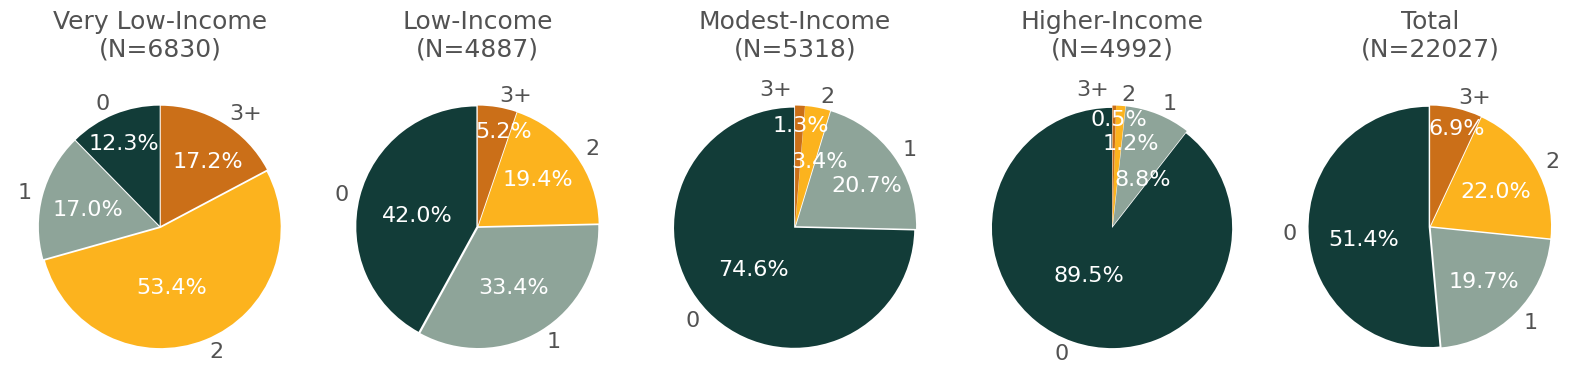

In [6]:
# Plot for the distrubition of renters based on the composite index
tmp0 = pd.crosstab(ahs21_pre['INCOME_CATEGORY'], ahs21_pre['COMPOSITE_HI'])

inc1_dist = tmp0.loc[1, 0:3]
inc2_dist = tmp0.loc[2, 0:3]
inc3_dist = tmp0.loc[3, 0:3]
inc4_dist = tmp0.loc[4, 0:3]

print(tmp0)

tmp = pd.crosstab(ahs21_pre['INCOME_CATEGORY'], ahs21_pre['COMPOSITE_HI2'])

inc1_dist = tmp.loc[1, 0:3]
inc2_dist = tmp.loc[2, 0:3]
inc3_dist = tmp.loc[3, 0:3]
inc4_dist = tmp.loc[4, 0:3]

print(tmp)
print(tmp.div(tmp.sum(axis=1), axis=0) * 100)

tmp = ahs21_pre['COMPOSITE_HI2'].value_counts()

inc0_dist = tmp.loc[0:3]

font_color = '#525252'
colors = ['#123C38', '#8EA499', '#FCB31E', '#CB6F18', '#414B0E']

hi_label = ['0', '1', '2', '3+']

fig, axes = plt.subplots(1, 5, figsize=(16, 4))

def plot_pie(ax, data, title, autotext_positions, adjust_labels=False):
  wedges, texts, autotexts = ax.pie(data, labels=hi_label, 
                                    autopct='%.1f%%', startangle=90, 
                                    explode=[0.01]*4, colors=colors)

  ax.set_title(title, color=font_color, fontsize=18, pad=15)

  if adjust_labels:
    texts[3].set_position((-0.3, 1.15))

  for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(16)
    autotext.set_color('white')
    autotext.set_position(autotext_positions[i])

  for text in texts:
    text.set_fontsize(16)
    text.set_color(font_color)

autotext_positions_1 = [(-0.3, 0.7), (-0.6, 0.15), (0.1, -0.5), (0.4, 0.55)]
autotext_positions_2 = [(-0.5, 0.1), (0.3, -0.5), (0.5, 0.4), (0.22, 0.8)]
autotext_positions_3 = [(-0.35, -0.35), (0.6, 0.35), (0.2, 0.55), (0.05, 0.85)]
autotext_positions_4 = [(-0.2, -0.4), (0.25, 0.4), (0.15, 0.7), (0.05, 0.9)]
autotext_positions_0 = [(-0.55, -0.1), (0.55, 0.3), (0.45, -0.45), (0.22, 0.82)]

plot_pie(axes[0], inc1_dist, 'Very Low-Income\n(N=6830)', 
         autotext_positions_1, adjust_labels=False)
plot_pie(axes[1], inc2_dist, 'Low-Income\n(N=4887)', 
         autotext_positions_2, adjust_labels=False)
plot_pie(axes[2], inc3_dist, 'Modest-Income\n(N=5318)', 
         autotext_positions_3, adjust_labels=True)
plot_pie(axes[3], inc4_dist, 'Higher-Income\n(N=4992)', 
         autotext_positions_4, adjust_labels=True)
plot_pie(axes[4], inc0_dist, 'Total\n(N=22027)', 
         autotext_positions_0, adjust_labels=False)

plt.tight_layout()
plt.savefig('./plots/renters_by_composite_index.png', bbox_inches='tight')
plt.show()

                    White     Black     Asian  Other races
Very Low-Income  0.526940  0.378331  0.051245     0.043485
Low-Income       0.607326  0.300593  0.049110     0.042971
Modest-Income    0.642347  0.257616  0.059797     0.040241
Higher-Income    0.691707  0.157853  0.112179     0.038261
Total            0.609979  0.281972  0.066645     0.041404


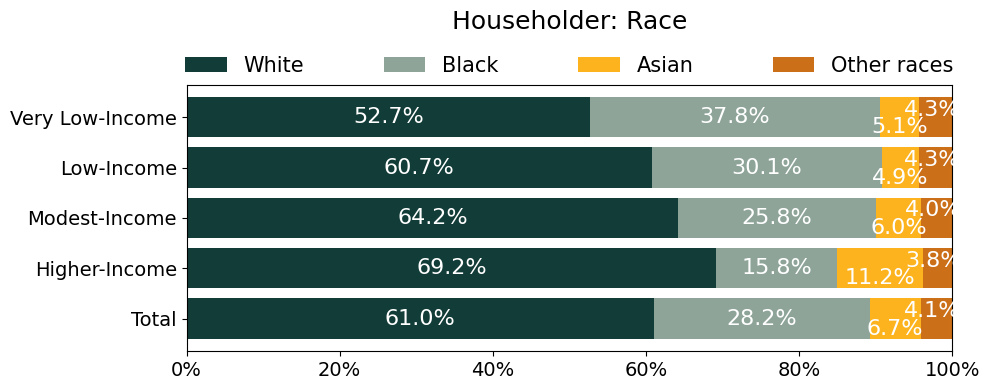

In [7]:
# EDA: race
cum_barplot_by_income(ahs21_pre, 'RACE_CATEGORY', 
                      ['White', 'Black', 'Asian', 'Other races'], 
                      'Householder: Race', (10, 4),
                      [10, 11, 12, 13, 14], 0.0, 0.2, 
                      [15, 16, 17, 18, 19], -0.005, -0.15, 
                      [18], -0.005, 0, 
                      [0], 0, 0)

--- Householder: Spanish Origain ---
Very Low    0.240410
Low         0.254144
Modest      0.249530
Higher      0.165665
Total       0.228719
Name: LATIN, dtype: float64
--- NOT Householder: Spanish Origain ---
Very Low    0.759590
Low         0.745856
Modest      0.750470
Higher      0.834335
Total       0.771281
Name: LATIN, dtype: float64


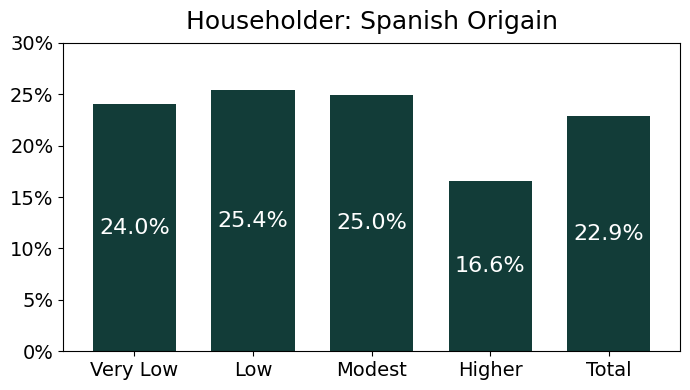

In [8]:
# EDA: householder's spanish origin
single_barplot_by_income_for_binary(ahs21_pre, 'LATIN', 
                                    'Householder: Spanish Origain', 
                                    (7, 4), [0, 0.3])

--- Householder: Non-U.S. Citizen ---
Very Low    0.109078
Low         0.138122
Modest      0.141407
Higher      0.126002
Total       0.127162
Name: NON_US_CITIZEN, dtype: float64
--- NOT Householder: Non-U.S. Citizen ---
Very Low    0.890922
Low         0.861878
Modest      0.858593
Higher      0.873998
Total       0.872838
Name: NON_US_CITIZEN, dtype: float64


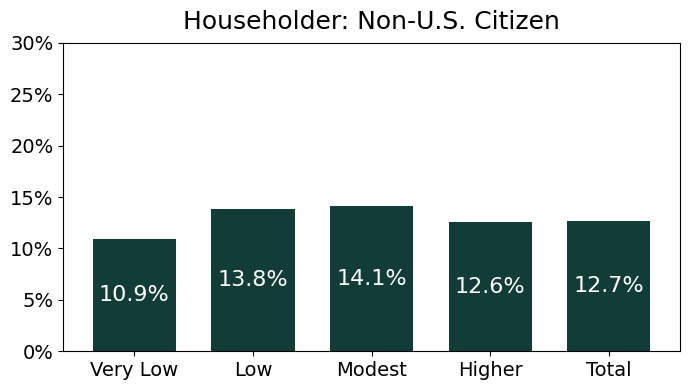

In [9]:
# EDA: non-US citizen
single_barplot_by_income_for_binary(ahs21_pre, 'NON_US_CITIZEN', 
                                    'Householder: Non-U.S. Citizen', 
                                    (7, 4), [0, 0.3])

                   Female      Male
Very Low-Income  0.706735  0.293265
Low-Income       0.636587  0.363413
Modest-Income    0.531591  0.468409
Higher-Income    0.425481  0.574519
Total            0.585146  0.414854


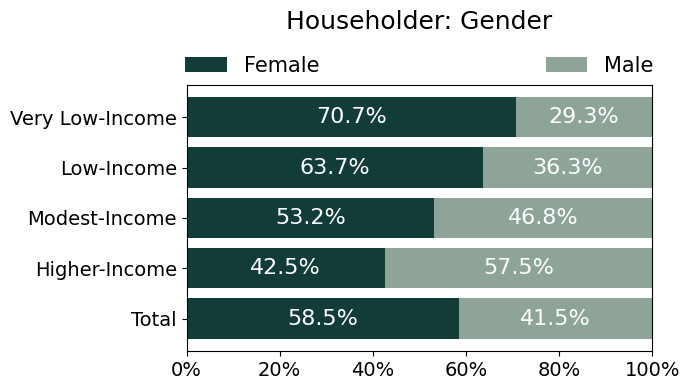

In [10]:
# EDA: gender
cum_barplot_by_income(ahs21_pre, 'MALE', 
                      ['Female', 'Male'], 
                      'Householder: Gender', (7, 4),
                      [0], 0, 0, [0], 0, 0, [0], 0, 0, [0], 0, 0)

                  Married  Separated  Never married
Very Low-Income  0.150952   0.434407       0.414641
Low-Income       0.245549   0.397585       0.356865
Modest-Income    0.310079   0.281121       0.408800
Higher-Income    0.337139   0.206931       0.455929
Total            0.252554   0.337676       0.409770


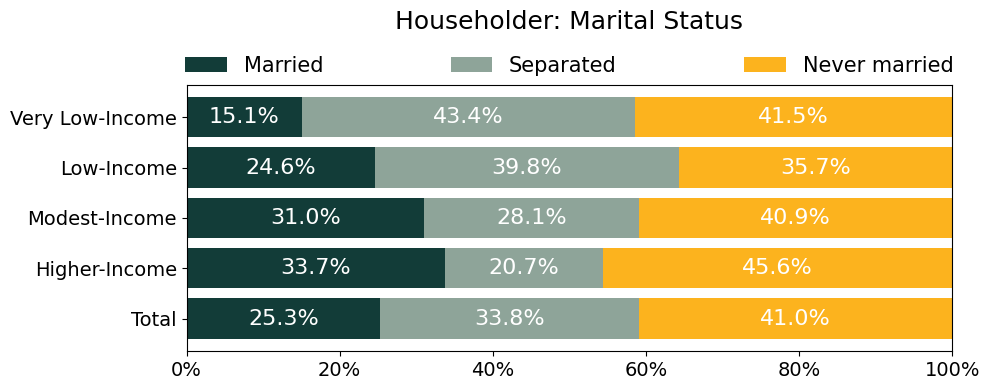

In [11]:
# EDA: marital status
cum_barplot_by_income(ahs21_pre, 'MAR_CATEGORY', 
                      ['Married', 'Separated', 'Never married'], 
                      'Householder: Marital Status', (10, 4),
                      [0], 0, 0, [0], 0, 0, [0], 0, 0, [0], 0, 0)

                 Under 25     25-34     35-44     45-54     55-64     65-74  \
Very Low-Income  0.050220  0.145095  0.161347  0.140556  0.186530  0.172035   
Low-Income       0.055658  0.161653  0.181093  0.146716  0.145079  0.168201   
Modest-Income    0.074652  0.244829  0.212110  0.172433  0.140842  0.089883   
Higher-Income    0.054087  0.340545  0.224559  0.174880  0.113982  0.058293   
Total            0.058201  0.217143  0.192309  0.157398  0.149862  0.125573   

                 75 and over  
Very Low-Income     0.144217  
Low-Income          0.141600  
Modest-Income       0.065250  
Higher-Income       0.033654  
Total               0.099514  
                  count       mean        std   min   25%   50%   75%   max
INCOME_CATEGORY                                                            
1.0              6830.0  53.423426  18.127861  15.0  38.0  55.0  68.0  85.0
2.0              4887.0  52.100880  18.416417  17.0  36.0  51.0  68.0  85.0
3.0              5318.0  45.470666 

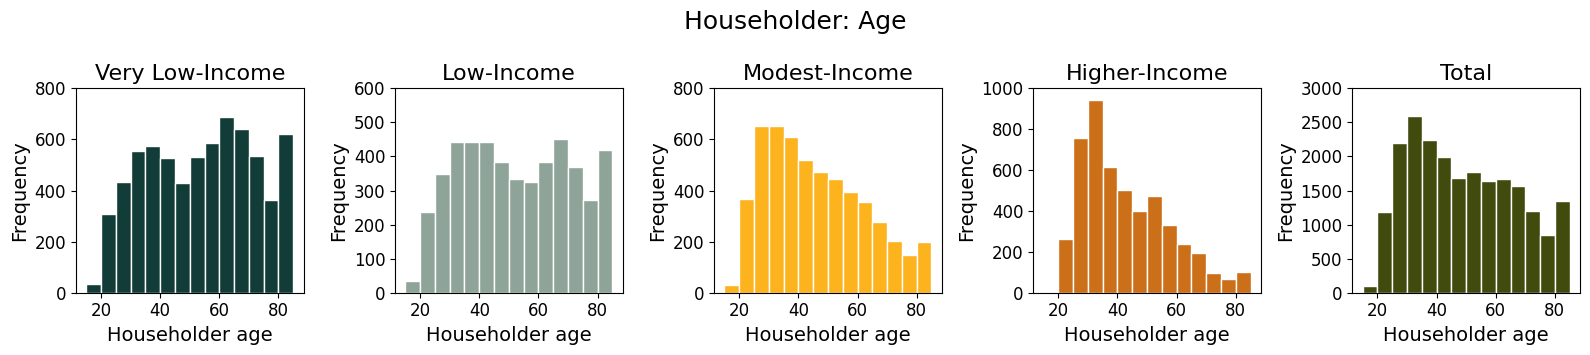

In [12]:
# EDA: age
rtable = pd.concat([pd.crosstab(ahs21_pre['AGE_CATEGORY'], 
                                ahs21_pre['INCOME_CATEGORY']), 
                                ahs21_pre['AGE_CATEGORY'].value_counts()], axis=1)
rtable.columns = ['Very Low-Income', 'Low-Income', 'Modest-Income', 
                  'Higher-Income', 'Total']
rtable.index = ['Under 25', '25-34', '35-44', '45-54', 
                '55-64', '65-74', '75 and over']

print((rtable.div(rtable.sum(axis=0), axis=1)).T)
print(ahs21_pre.groupby('INCOME_CATEGORY')['HH_AGE'].describe())
print(ahs21_pre['HH_AGE'].describe())

histogram_by_income(ahs21_pre, 'HH_AGE', 'Householder age', 'Householder: Age', 
                    (16, 3.5), [800, 600, 800, 1000, 3000], 14)

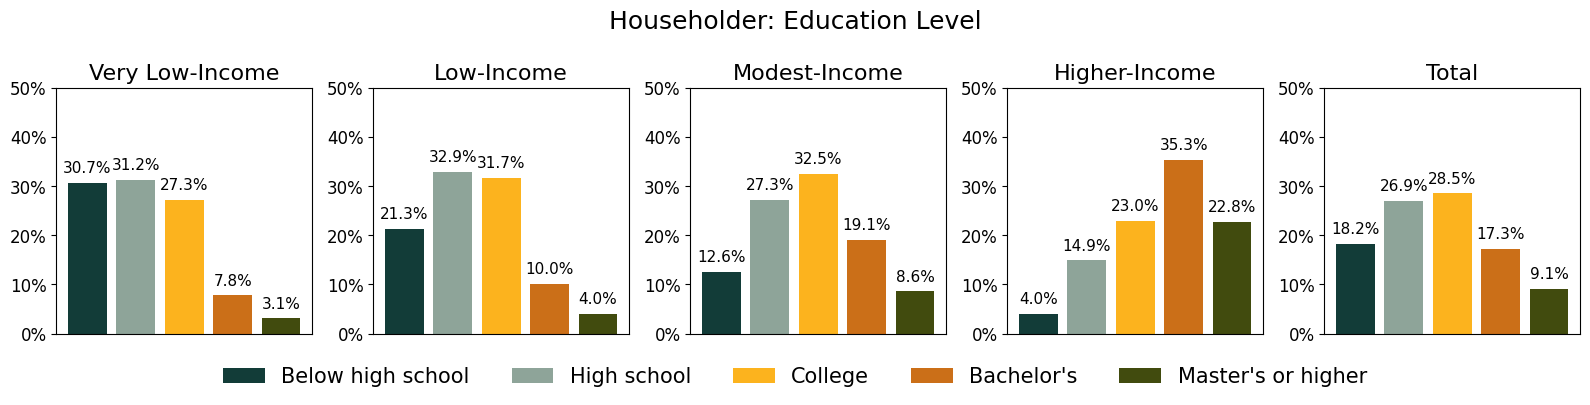

In [13]:
# EDA: education level
multi_barplots_by_income(ahs21_pre, 'GRAD_CATEGORY', 
                         ["Below high school", "High school", "College", 
                          "Bachelor's", "Master's or higher"], 
                         'Householder: Education Level', (16, 3.5), 0.5) 

                 Less than 5 years  5 to less than 10 years  10 years or more
Very Low-Income           0.509956                 0.219766          0.270278
Low-Income                0.556169                 0.225292          0.218539
Modest-Income             0.657766                 0.181271          0.160963
Higher-Income             0.733974                 0.154848          0.111178
Total                     0.606665                 0.196986          0.196350


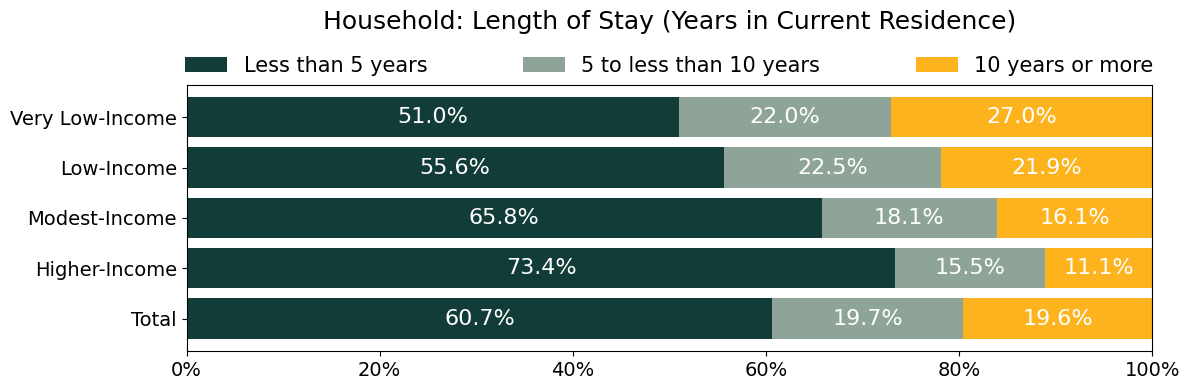

In [14]:
# EDA: length of stay
cum_barplot_by_income(ahs21_pre, 'STAY_CATEGORY', 
                      ['Less than 5 years', '5 to less than 10 years', 
                       '10 years or more'], 
                      'Household: Length of Stay (Years in Current Residence)', 
                      (12, 4),
                      [0], 0, 0, [0], 0, 0, [0], 0, 0, [0], 0, 0)

--- Household: Presence of
Young Children (Under Age 6) ---
Very Low    0.148463
Low         0.135871
Modest      0.122414
Higher      0.069912
Total       0.121578
Name: YNGKIDS, dtype: float64
--- NOT Household: Presence of
Young Children (Under Age 6) ---
Very Low    0.851537
Low         0.864129
Modest      0.877586
Higher      0.930088
Total       0.878422
Name: YNGKIDS, dtype: float64


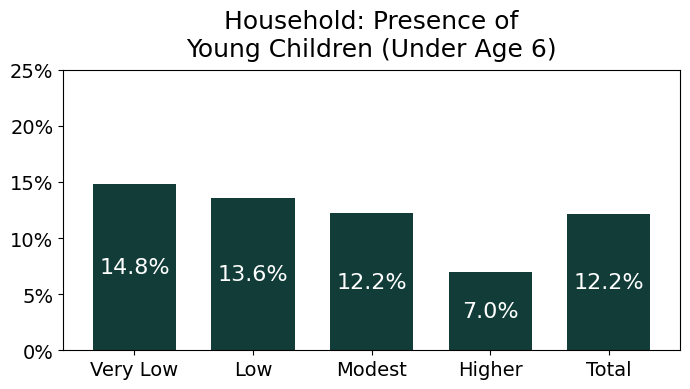

In [15]:
# EDA: presence of young children
single_barplot_by_income_for_binary(ahs21_pre, 'YNGKIDS', 
                                    'Household: Presence of\nYoung Children (Under Age 6)', 
                                    (7, 4), [0, 0.25])

--- Household: Presence of
Seniors (Age 65 or Older) ---
Very Low    0.331625
Low         0.333743
Modest      0.186912
Higher      0.115785
Total       0.248241
Name: SENIORS, dtype: float64
--- NOT Household: Presence of
Seniors (Age 65 or Older) ---
Very Low    0.668375
Low         0.666257
Modest      0.813088
Higher      0.884215
Total       0.751759
Name: SENIORS, dtype: float64


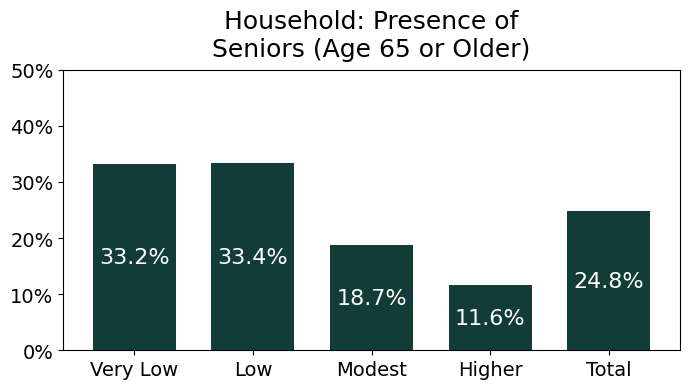

In [16]:
# presence of seniors
single_barplot_by_income_for_binary(ahs21_pre, 'SENIORS', 
                                    'Household: Presence of\nSeniors (Age 65 or Older)', 
                                    (7, 4), [0, 0.5])

--- Household: Presence of
Disabled Members ---
Very Low    0.426647
Low         0.347657
Modest      0.189169
Higher      0.105970
Total       0.279112
Name: DISABLED, dtype: float64
--- NOT Household: Presence of
Disabled Members ---
Very Low    0.573353
Low         0.652343
Modest      0.810831
Higher      0.894030
Total       0.720888
Name: DISABLED, dtype: float64


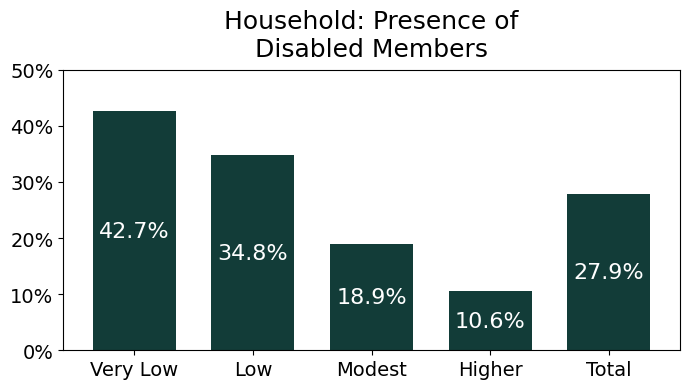

In [17]:
# EDA: presence of disabled members
single_barplot_by_income_for_binary(ahs21_pre, 'DISABLED', 
                                    'Household: Presence of\nDisabled Members', 
                                    (7, 4), [0, 0.5])

--- Household: Average Number of
Household Members ---
          Very Low          Low       Modest       Higher         Total
count  6830.000000  4887.000000  5318.000000  4992.000000  22027.000000
mean      2.160615     2.328422     2.356337     2.057893      2.221819
std       1.618860     1.617159     1.429935     1.112782      1.476813
min       1.000000     1.000000     1.000000     1.000000      1.000000
25%       1.000000     1.000000     1.000000     1.000000      1.000000
50%       1.000000     2.000000     2.000000     2.000000      2.000000
75%       3.000000     3.000000     3.000000     3.000000      3.000000
max      16.000000    19.000000    11.000000     9.000000     19.000000


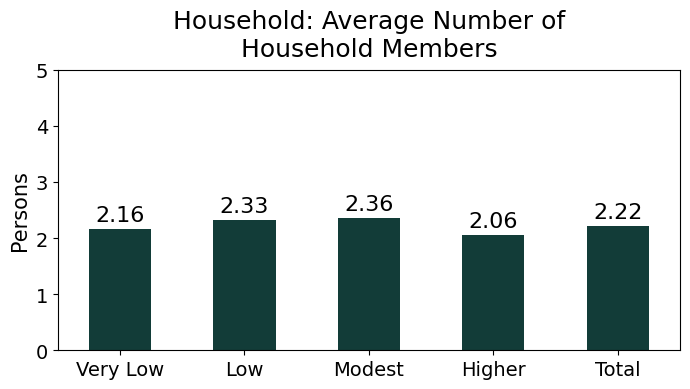

In [18]:
# EDA: average number of household members
single_barplot_by_income_for_continuous(ahs21_pre, 'NUM_MEMBERS', 'Persons', 
                                        "Household: Average Number of\nHousehold Members", 
                                        (7, 4), [0, 5], 0.05)

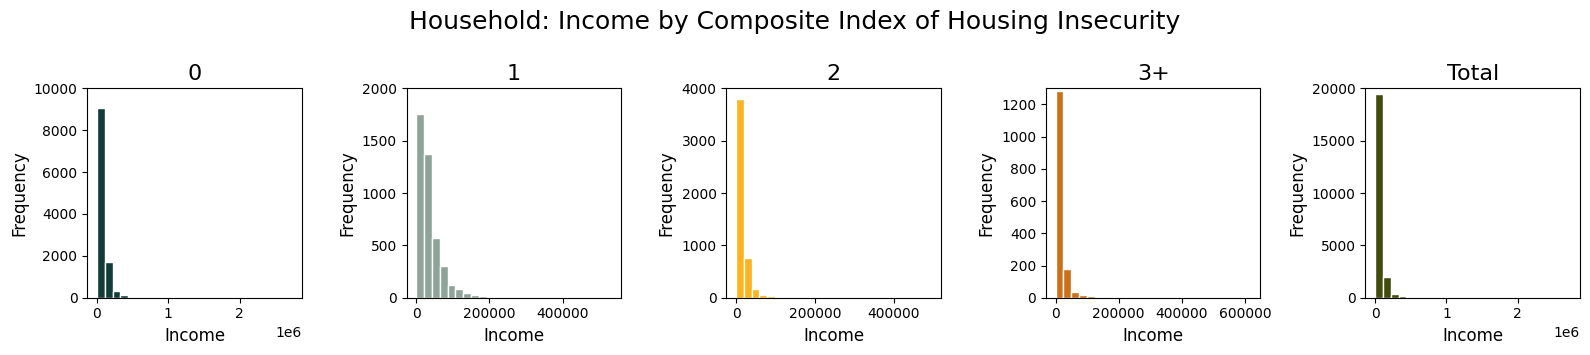

In [19]:
# EDA: income by composite index of housing insecurity
histogram_by_hi(ahs21_pre, 'INCOME', 'Income', 
                'Household: Income by Composite Index of Housing Insecurity', 
                (16, 3.5), [10000, 2000, 4000, 1300, 20000], 25)

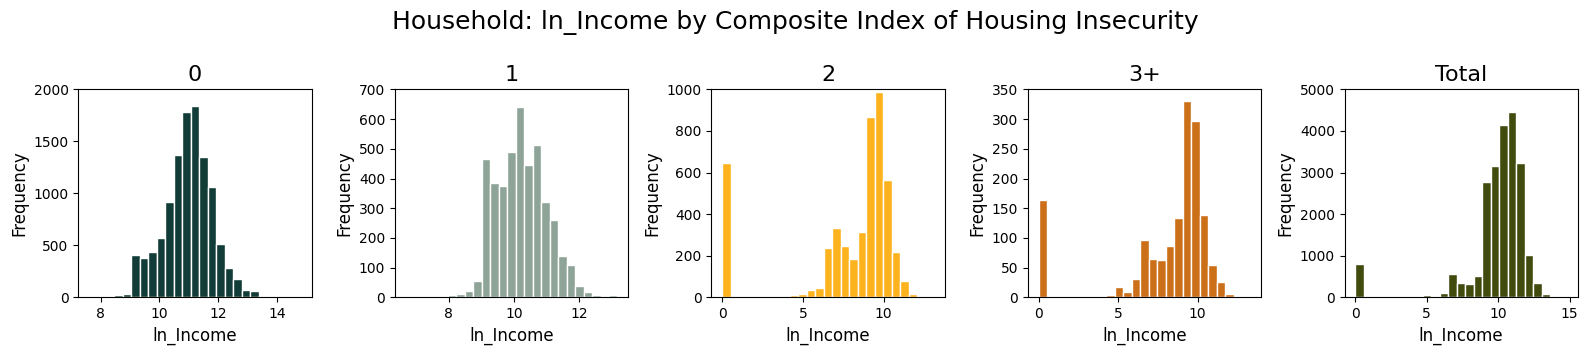

In [20]:
# EDA: ln_income by composite index of housing insecurity
histogram_by_hi(ahs21_pre, 'LN_INCOME', 'ln_Income', 
                'Household: ln_Income by Composite Index of Housing Insecurity', 
                (16, 3.5), [2000, 700, 1000, 350, 5000], 25)

--- House: Average Age of Houses ---
          Very Low          Low       Modest       Higher         Total
count  6830.000000  4887.000000  5318.000000  4992.000000  22027.000000
mean     53.456662    52.290362    50.074652    47.387620     51.005947
std      26.123547    26.013768    26.728271    29.405173     27.119895
min       0.000000     0.000000     0.000000     0.000000      0.000000
25%      31.000000    31.000000    31.000000    21.000000     31.000000
50%      51.000000    51.000000    51.000000    41.000000     51.000000
75%      71.000000    71.000000    71.000000    71.000000     71.000000
max     102.000000   102.000000   102.000000   102.000000    102.000000


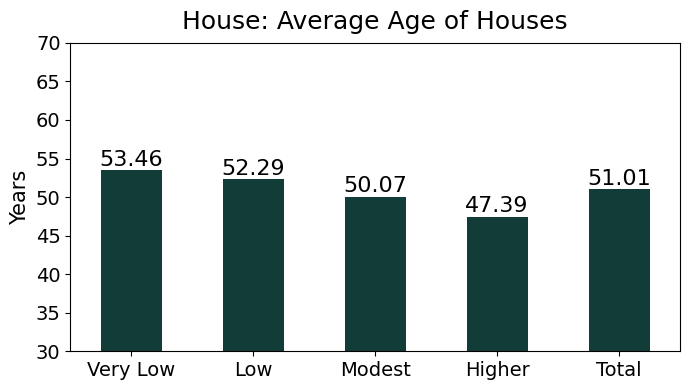

In [21]:
# EDA: average age of houses
single_barplot_by_income_for_continuous(ahs21_pre, 'HOUSE_AGE', 'Years', 
                                        "House: Average Age of Houses", 
                                        (7, 4), [30, 70], 0.02)

                 One-family house  Apartment  Mobile house
Very Low-Income          0.239531   0.743045      0.017423
Low-Income               0.281973   0.696542      0.021486
Modest-Income            0.312900   0.663783      0.023317
Higher-Income            0.328726   0.665665      0.005609
Total                    0.286875   0.696055      0.017070


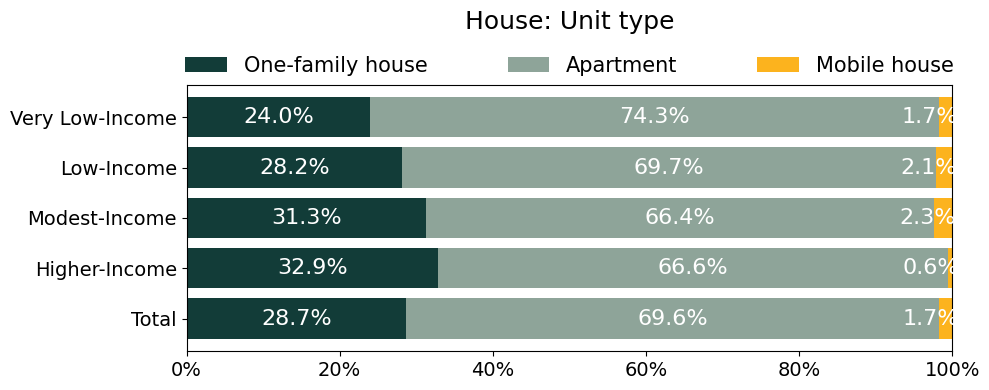

In [22]:
# EDA: unit type
cum_barplot_by_income(ahs21_pre, 'UNIT_CATEGORY', 
                      ['One-family house', 'Apartment', 'Mobile house'], 
                      'House: Unit type', (10, 4),
                      [10, 11, 12, 14], -0.02, 0, [13], -0.025, 0, 
                      [0], 0, 0, [0], 0, 0)

--- Community: No Good Schools ---
Very Low    0.116252
Low         0.098015
Modest      0.093268
Higher      0.070713
Total       0.096336
Name: NOGOODSCHOOL, dtype: float64
--- NOT Community: No Good Schools ---
Very Low    0.883748
Low         0.901985
Modest      0.906732
Higher      0.929287
Total       0.903664
Name: NOGOODSCHOOL, dtype: float64


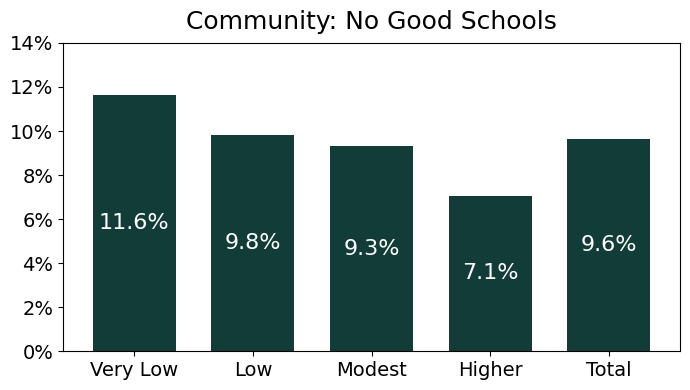

In [23]:
# EDA: no good school
single_barplot_by_income_for_binary(ahs21_pre, 'NOGOODSCHOOL', 
                                    'Community: No Good Schools', 
                                    (7, 4), [0, 0.14])

--- Community: No Good Public Transportation ---
Very Low    0.237042
Low         0.267444
Modest      0.294472
Higher      0.306090
Total       0.273301
Name: NOGOODPTRNS, dtype: float64
--- NOT Community: No Good Public Transportation ---
Very Low    0.762958
Low         0.732556
Modest      0.705528
Higher      0.693910
Total       0.726699
Name: NOGOODPTRNS, dtype: float64


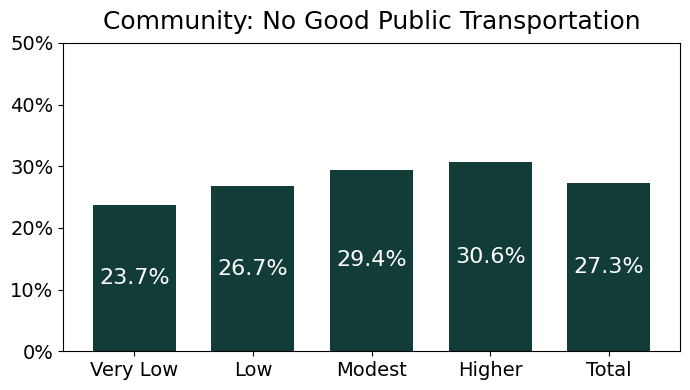

In [24]:
# EDA: no good public transportaion
single_barplot_by_income_for_binary(ahs21_pre, 'NOGOODPTRNS', 
                                    'Community: No Good Public Transportation', 
                                    (7, 4), [0, 0.5])

--- Community: High Levels of Petty Crime ---
Very Low    0.350805
Low         0.307551
Modest      0.265325
Higher      0.208133
Total       0.288237
Name: HIGH_PCRIME, dtype: float64
--- NOT Community: High Levels of Petty Crime ---
Very Low    0.649195
Low         0.692449
Modest      0.734675
Higher      0.791867
Total       0.711763
Name: HIGH_PCRIME, dtype: float64


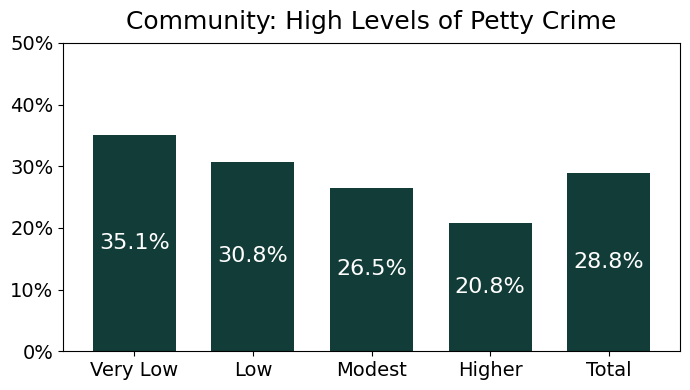

In [25]:
# EDA: high levels of petty crime
single_barplot_by_income_for_binary(ahs21_pre, 'HIGH_PCRIME', 
                                    'Community: High Levels of Petty Crime', 
                                    (7, 4), [0, 0.5])

--- Community: High Levels of Serious Crime ---
Very Low    0.216105
Low         0.150604
Modest      0.110944
Higher      0.076522
Total       0.144550
Name: HIGH_SCRIME, dtype: float64
--- NOT Community: High Levels of Serious Crime ---
Very Low    0.783895
Low         0.849396
Modest      0.889056
Higher      0.923478
Total       0.855450
Name: HIGH_SCRIME, dtype: float64


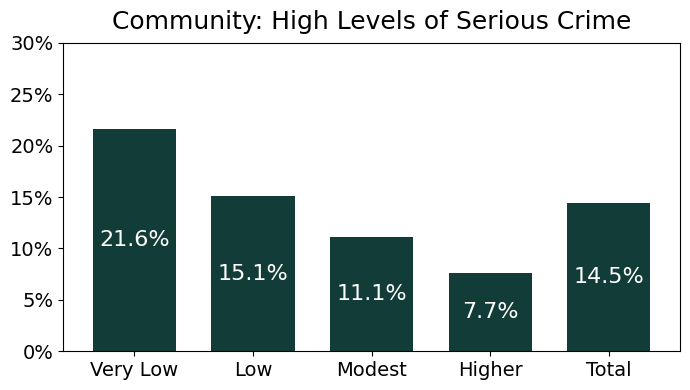

In [26]:
# EDA: high levels of serious crime
single_barplot_by_income_for_binary(ahs21_pre, 'HIGH_SCRIME', 
                                    'Community: High Levels of Serious Crime', 
                                    (7, 4), [0, 0.3])

--- Community: High Disaster Risk ---
Very Low    0.120644
Low         0.100675
Modest      0.091952
Higher      0.089543
Total       0.102238
Name: HIGH_RISK, dtype: float64
--- NOT Community: High Disaster Risk ---
Very Low    0.879356
Low         0.899325
Modest      0.908048
Higher      0.910457
Total       0.897762
Name: HIGH_RISK, dtype: float64


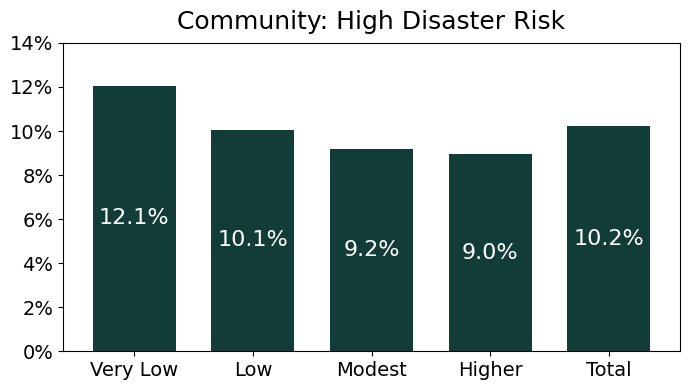

In [27]:
# EDA: high disaster risk
single_barplot_by_income_for_binary(ahs21_pre, 'HIGH_RISK', 
                                    'Community: High Disaster Risk', 
                                    (7, 4), [0, 0.14])

--- Housing Policy: Rent Control ---
Very Low    0.030600
Low         0.023736
Modest      0.022001
Higher      0.044071
Total       0.030054
Name: RENT_CONTROL, dtype: float64
--- NOT Housing Policy: Rent Control ---
Very Low    0.969400
Low         0.976264
Modest      0.977999
Higher      0.955929
Total       0.969946
Name: RENT_CONTROL, dtype: float64


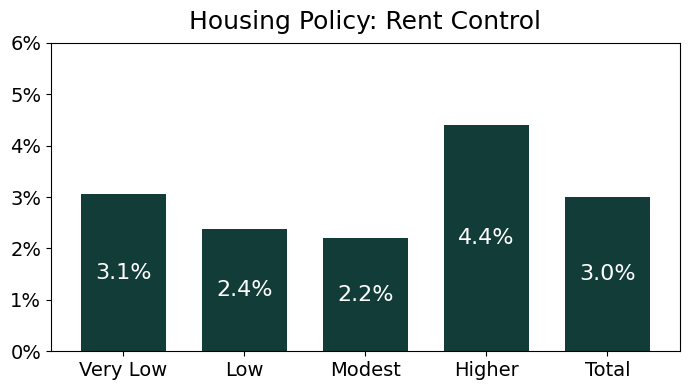

In [7]:
# EDA: rent-controlled
single_barplot_by_income_for_binary(ahs21_pre, 'RENT_CONTROL', 
                                    'Housing Policy: Rent Control', 
                                    (7, 4), [0, 0.06])

                 Subsidized Unit (non-voucher)  Voucher Unit  Unassisted Unit
Very Low-Income                       0.369985      0.258858         0.371157
Low-Income                            0.211991      0.161653         0.626356
Modest-Income                         0.059045      0.067507         0.873449
Higher-Income                         0.017428      0.024639         0.957933
Total                                 0.179961      0.138012         0.682027


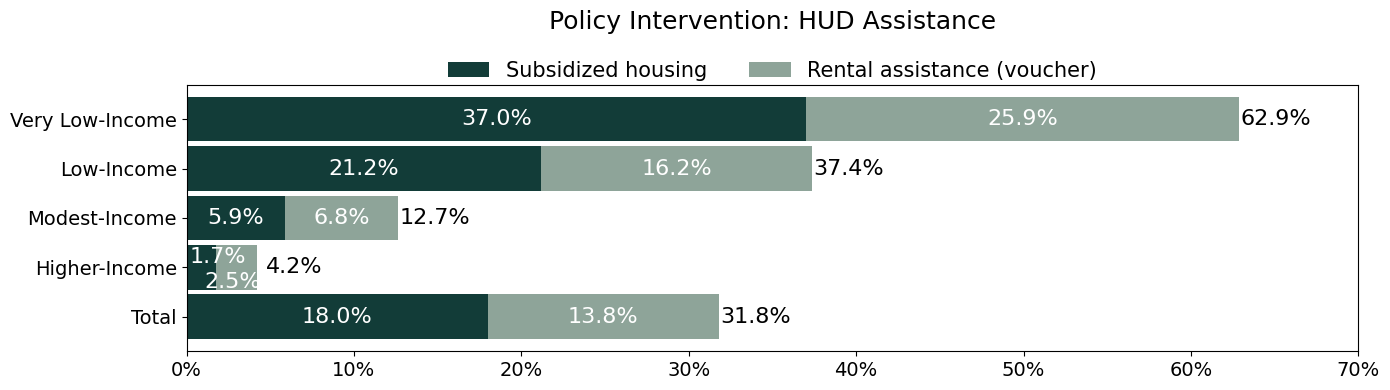

In [10]:
# EDA: HUD-assisted
plot_for_hud_assisted(ahs21_pre, 'Policy Intervention: HUD Assistance', (14, 4))

In [39]:
# US census region
rtable = pd.concat([pd.crosstab(ahs21_pre['DIV4'], 
                                ahs21_pre['INCOME_CATEGORY']), 
                                ahs21_pre['DIV4'].value_counts()], axis=1)
rtable.columns = ['Very Low-Income','Low-Income', 'Modest-Income', 
                  'Higher-Income', 'Total']
rtable.index = ['Northweat (Div1)', 'Midwest (Div2)', 'South (Div3)', 'West (Div4)']

print((rtable.div(rtable.sum(axis=0), axis=1)).T)

                 Northweat (Div1)  Midwest (Div2)  South (Div3)  West (Div4)
Very Low-Income          0.231332        0.163836      0.374085     0.230747
Low-Income               0.207285        0.161858      0.355024     0.275834
Modest-Income            0.188229        0.141219      0.365175     0.305378
Higher-Income            0.190304        0.100962      0.314103     0.394631
Total                    0.206292        0.143687      0.354111     0.295910


In [45]:
# Export variable statistics
race_income = pd.crosstab(ahs21_pre['RACE_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
latin_income = pd.crosstab(ahs21_pre['LATIN'], ahs21_pre['INCOME_CATEGORY'])
citizen_income = pd.crosstab(ahs21_pre['NON_US_CITIZEN'], ahs21_pre['INCOME_CATEGORY'])
male_income = pd.crosstab(ahs21_pre['MALE'], ahs21_pre['INCOME_CATEGORY'])
grad_income = pd.crosstab(ahs21_pre['GRAD_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
mar_income = pd.crosstab(ahs21_pre['MAR_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
stay_income = pd.crosstab(ahs21_pre['STAY_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
ykids_income = pd.crosstab(ahs21_pre['YNGKIDS'], ahs21_pre['INCOME_CATEGORY'])
seniors_income = pd.crosstab(ahs21_pre['SENIORS'], ahs21_pre['INCOME_CATEGORY'])
disabled_income = pd.crosstab(ahs21_pre['DISABLED'], ahs21_pre['INCOME_CATEGORY'])
unit_income = pd.crosstab(ahs21_pre['UNIT_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
c1_income = pd.crosstab(ahs21_pre['NOGOODSCHOOL'], ahs21_pre['INCOME_CATEGORY'])
c2_income = pd.crosstab(ahs21_pre['NOGOODPTRNS'], ahs21_pre['INCOME_CATEGORY'])
c3_income = pd.crosstab(ahs21_pre['HIGH_PCRIME'], ahs21_pre['INCOME_CATEGORY'])
c4_income = pd.crosstab(ahs21_pre['HIGH_SCRIME'], ahs21_pre['INCOME_CATEGORY'])
c5_income = pd.crosstab(ahs21_pre['HIGH_RISK'], ahs21_pre['INCOME_CATEGORY'])
rcontrol_income = pd.crosstab(ahs21_pre['RENT_CONTROL'], ahs21_pre['INCOME_CATEGORY'])
hud_income = pd.crosstab(ahs21_pre['HUD_CATEGORY'], ahs21_pre['INCOME_CATEGORY'])
region_income = pd.crosstab(ahs21_pre['DIV4'], ahs21_pre['INCOME_CATEGORY'])

combined = pd.concat([
    race_income, latin_income, citizen_income, male_income, grad_income, mar_income,
    stay_income, ykids_income, seniors_income, disabled_income, unit_income,
    c1_income, c2_income, c3_income, c4_income, c5_income,
    rcontrol_income, hud_income, region_income
], axis=0)

combined.to_csv("./temp/combined_crosstab.csv")

In [61]:
# Check "no response" in community characteristics
print(pd.concat([ahs21_pre['NHQSCHOOL'].value_counts(),
                 ahs21_pre['NHQSCHOOL'].value_counts()/ahs21_pre.shape[0]], axis=1)) # NOGOODSCHOOL
print(pd.concat([ahs21_pre['NHQPUBTRN'].value_counts(),
                 ahs21_pre['NHQPUBTRN'].value_counts()/ahs21_pre.shape[0]], axis=1)) # NOGOODPTRNS
print(pd.concat([ahs21_pre['NHQPCRIME'].value_counts(),
                 ahs21_pre['NHQPCRIME'].value_counts()/ahs21_pre.shape[0]], axis=1)) # HIGH_PCRIME
print(pd.concat([ahs21_pre['NHQSCRIME'].value_counts(),
                 ahs21_pre['NHQSCRIME'].value_counts()/ahs21_pre.shape[0]], axis=1)) # HIGH_SCRIME
print(pd.concat([ahs21_pre['NHQRISK'].value_counts(),
                 ahs21_pre['NHQRISK'].value_counts()/ahs21_pre.shape[0]], axis=1)) # NHQRISK

           count     count
NHQSCHOOL                 
 1         16032  0.727834
-9          3873  0.175830
 2          2122  0.096336
           count     count
NHQPUBTRN                 
 1         14446  0.655831
 2          6020  0.273301
-9          1561  0.070868
           count     count
NHQPCRIME                 
 2         14358  0.651836
 1          6349  0.288237
-9          1320  0.059926
           count     count
NHQSCRIME                 
 2         17731  0.804967
 1          3184  0.144550
-9          1112  0.050483
         count     count
NHQRISK                 
 2       18890  0.857584
 1        2252  0.102238
-9         885  0.040178
